In [ ]:
# 2-1 20183376 박선재

import random             # random library import

a = random.uniform(0, 1)  # 균등 분포에서 0 <= N <= 1 사이 랜덤한 실수 a
b = random.uniform(0, 1)  # 균등 분포에서 0 <= N <= 1 사이 랜덤한 실수 b

c = a + b                 # a와 b를 더하여 변수 c에 대입
print(a, b, c)            # 변수 a, b, c 출력

0.04266134027595636 0.0072776674179990675 0.04993900769395543


In [ ]:
# 2-3 20183376 박선재

import random             # random library import
import time

start = time.time()            # start time

sum = 0

# 1억번 반복
for i in range(1, 100000001):
  sum += random.uniform(0, 1)  # 균등 분포에서 0 <= N <= 1 사이 랜덤한 실수 a

end = time.time()              # end time

print("1+2+...+100000000 =", sum)
print('소요 시간은 ', end-start, '초입니다.')



1+2+...+100000000 = 50001457.208164975
소요 시간은  24.709224700927734 초입니다.


In [ ]:
# 2-3 20183376 박선재

import numpy as np
import time


start = time.time()            # start time

A = np.random.uniform(0, 1, [10000, 10000])  # numpy의 균등 분포 10000 * 10000 행렬
sum = np.cumsum(A)                           # 누적합 계산

end = time.time()              # end time

print("1+2+...+100000000 =", sum[-1])
print('소요 시간은 ', end-start, '초입니다.')



1+2+...+100000000 = 49993202.91536359
소요 시간은  1.635833740234375 초입니다.


In [ ]:
# 3-2 20183376 박선재

import numpy as np
from sklearn import svm, datasets

s = svm.SVC(gamma=.1, C=10)
d = datasets.load_iris()

random_index = np.random.randint(0, d.target.size, 20)

test_X = d.data[random_index]; test_Y = d.target[random_index]
random_value = np.random.uniform(0.95, 1.05, test_X.shape)

test_X = test_X * random_value

s.fit(d.data, d.target)
pred_Y = s.predict(test_X)

label_num = np.max(d.target) + 1
confusion_matrix = np.zeros((label_num, label_num))
for i in range(0, len(test_X)):
  confusion_matrix[pred_Y[i]][test_Y[i]] += 1

accuracy = 0
for i in range(0, label_num):
  accuracy += confusion_matrix[i][i]
accuracy /= len(test_X)

print(f"새로운 {len(pred_Y)}개 샘플의 부류는", pred_Y)
print(f"새로운 {len(test_Y)}개 샘플의 실제는", test_Y)
print("\nConfusion Matrix\n", confusion_matrix)
print("\nAccuracy >>", accuracy*100, '%')

새로운 20개 샘플의 부류는 [1 2 2 1 0 1 1 2 2 0 0 2 0 0 2 1 2 2 0 1]
새로운 20개 샘플의 실제는 [1 2 2 1 0 1 1 2 2 0 0 2 0 0 2 1 2 2 0 1]

Confusion Matrix
 [[6. 0. 0.]
 [0. 6. 0.]
 [0. 0. 8.]]

Accuracy >> 100.0 %


In [ ]:
# 3-3 20183376 박선재

import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_width', \
                    y='petal_length', z='petal_width', color='species')
fig.show()

'''
데이터의 분포를 보면 petal width 특징에서 Setosa는 아래쪽,
중간에는 Versicolor, 윗쪽에는 Virginica가 위치한다.
전체적으로 보았을 때는 세 부류가 3차원 공간에서 서로 다른 영역을 차지하지만 몇 개의 샘플들은
겹쳐서 나타난다.
각각 축을 확인해보면 sepal_length, sepal_width, petal_width가 존재하는데
sepal_length, sepal_width는  세 부류가 많이 겹치기 때문에 분별력이 낮다.
이에 비해 petal_width는 세 부류가 많이 겹치지 않기 때문에 분별력이 뛰어나다고 볼 수 있다.
'''

'\n데이터의 분포를 보면 petal width 특징에서 Setosa는 아래쪽,\n중간에는 Versicolor, 윗쪽에는 Virginica가 위치한다.\n전체적으로 보았을 때는 세 부류가 3차원 공간에서 서로 다른 영역을 차지하지만 몇 개의 샘플들은\n겹쳐서 나타난다.\n각각 축을 확인해보면 sepal_length, sepal_width, petal_width가 존재하는데\nsepal_length, sepal_width는  세 부류가 많이 겹치기 때문에 분별력이 낮다.\n이에 비해 petal_width는 세 부류가 많이 겹치지 않기 때문에 분별력이 뛰어나다고 볼 수 있다.\n'

In [ ]:
# 3-11 20183376 박선재

import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

SVM = 0
DECISION_TREE = 1
RANDOM_FOREST = 2


digit = load_digits()

train_X, test_X, train_Y, test_Y = train_test_split(digit.data, digit.target, \
                                                    test_size=.3)

model_ls = np.array([SVC(), RandomForestClassifier(), DecisionTreeClassifier()])
score_ls = np.array([cross_val_score(model_ls[SVM], train_X, train_Y, cv=5), \
                     cross_val_score(model_ls[DECISION_TREE], train_X, train_Y, cv=5), \
                     cross_val_score(model_ls[RANDOM_FOREST], train_X, train_Y, cv=5)])

print('              svm(SVC) score >> ', score_ls[SVM])
print('RandomForestClassifier score >> ', score_ls[DECISION_TREE])
print('DecisionTreeClassifier score >> ', score_ls[RANDOM_FOREST])

print('\n              svm(SVC) accuracy(mean) >> ', score_ls[SVM].mean()*100)
print('RandomForestClassifier accuracy(mean) >> ', score_ls[DECISION_TREE].mean()*100)
print('DecisionTreeClassifier accuracy(mean) >> ', score_ls[RANDOM_FOREST].mean()*100)

print('\n              svm(SVC) std >> ', score_ls[SVM].std())
print('RandomForestClassifier std >> ', score_ls[DECISION_TREE].std())
print('DecisionTreeClassifier std >> ', score_ls[RANDOM_FOREST].std())

model = model_ls[np.argmax(score_ls.mean(axis=1))]
print('\nDecision model >>', model)

model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

label_num = np.max(digit.target) + 1
confusion_matrix = np.zeros((label_num, label_num))
for i in range(0, len(test_X)):
  confusion_matrix[pred_Y[i]][test_Y[i]] += 1

accuracy = 0
for i in range(0, label_num):
  accuracy += confusion_matrix[i][i]
accuracy /= len(test_X)

print("\nConfusion Matrix\n", confusion_matrix)
print("\nAccuracy >>", accuracy*100, '%')

              svm(SVC) score >>  [0.99206349 0.99206349 1.         0.98406375 0.98406375]
RandomForestClassifier score >>  [0.96428571 0.98809524 0.99203187 0.9561753  0.97211155]
DecisionTreeClassifier score >>  [0.86904762 0.8452381  0.86055777 0.81673307 0.83266932]

              svm(SVC) accuracy(mean) >>  99.0450894833365
RandomForestClassifier accuracy(mean) >>  97.45399354961108
DecisionTreeClassifier accuracy(mean) >>  84.4849174729653

              svm(SVC) std >>  0.00596620004048565
RandomForestClassifier std >>  0.013696861393926724
DecisionTreeClassifier std >>  0.018822009277716673

Decision model >> SVC()

Confusion Matrix
 [[50.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 64.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0. 58.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 51.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. 49.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 49.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 41.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 54.  0.  0.]
 [ 0.  

새로운 11개 샘플의 부류는
 [103.89876316 106.41871053 108.93865789 111.45860526 113.97855263
 116.4985     119.01844737 121.53839474 124.05834211 126.57828947
 129.09823684]
새로운 11개 샘플의 실제는
 [ 90.99 117.63  13.24  87.68  41.47  87.32  74.59  45.86  70.15  74.28
 158.94]
RMSE(평균제곱근오차) >> 52.53372688120363


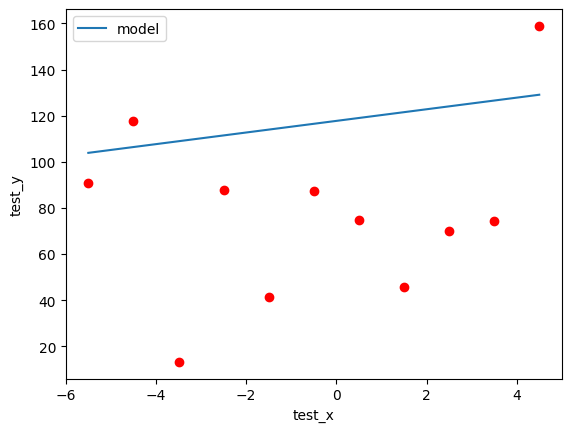

In [ ]:
# 추가문항 3-1. (선형회귀) 20183376 박선재

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def Rmse(_pred_y, _test_y):
  return np.sqrt(np.mean(np.power(_pred_y-_test_y, 2)))

train_x = np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, \
           0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
train_y = np.array([202.45, 203.32, 171.74, 85.7, 112.88, 67.83, \
           81.82, 35.49, 8.79, 20.1, 36.63, 22.92, 118.65, \
           128.87, 72.08, 172.25, 181.01, 172.66, 177.26, 257.52])

test_x = np.array([-5.5, -4.5, -3.5, -2.5, -1.5, \
                   -0.5, 0.5, 1.5, 2.5, 3.5, 4.5])
test_y = np.array([ 90.99, 117.63, 13.24, 87.68, 41.47, \
                   87.32, 74.59, 45.86, 70.15, 74.28, 158.94])

model = LinearRegression()
model.fit(train_x.reshape(-1, 1), train_y)

pred_y = model.predict(test_x.reshape(-1, 1))

print(f'새로운 {len(pred_y)}개 샘플의 부류는\n', pred_y)
print(f'새로운 {len(test_y)}개 샘플의 실제는\n', test_y)
print('RMSE(평균제곱근오차) >>', Rmse(pred_y, test_y))

plt.scatter(test_x, test_y, color='r')
plt.xlabel('test_x'); plt.ylabel('test_y')
plt.plot(test_x, pred_y, label='model'); plt.legend()

새로운 11개 샘플의 부류는
 [ 86.38611748  69.80136048  57.46209333  49.36831605  45.52002862
  45.91723106  50.55992336  59.44810552  72.58177754  89.96093942
 111.58559117]
새로운 11개 샘플의 실제는
 [ 90.99 117.63  13.24  87.68  41.47  87.32  74.59  45.86  70.15  74.28
 158.94]
RMSE(평균제곱근오차) >> 31.21635905744777


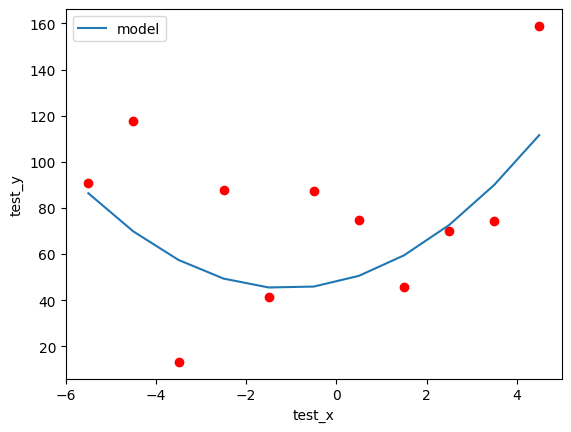

In [ ]:
# 추가문항 3-1. (2차 다항회귀) 20183376 박선재

import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def Rmse(_pred_y, _test_y):
  return np.sqrt(np.mean(np.power(_pred_y-_test_y, 2)))

train_x = np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, \
           0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
train_y = np.array([202.45, 203.32, 171.74, 85.7, 112.88, 67.83, \
           81.82, 35.49, 8.79, 20.1, 36.63, 22.92, 118.65, \
           128.87, 72.08, 172.25, 181.01, 172.66, 177.26, 257.52])

test_x = np.array([-5.5, -4.5, -3.5, -2.5, -1.5, \
                   -0.5, 0.5, 1.5, 2.5, 3.5, 4.5])
test_y = np.array([ 90.99, 117.63, 13.24, 87.68, 41.47, \
                   87.32, 74.59, 45.86, 70.15, 74.28, 158.94])

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=True), \
                      LinearRegression())
model.fit(train_x.reshape(-1, 1), train_y)

pred_y = model.predict(test_x.reshape(-1, 1))

print(f'새로운 {len(pred_y)}개 샘플의 부류는\n', pred_y)
print(f'새로운 {len(test_y)}개 샘플의 실제는\n', test_y)
print('RMSE(평균제곱근오차) >>', Rmse(pred_y, test_y))

plt.scatter(test_x, test_y, color='r')
plt.xlabel('test_x'); plt.ylabel('test_y')
plt.plot(test_x, pred_y, label='model'); plt.legend()

In [ ]:
# 4-7 (1) 20183376 박선재

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split \
 (digit.data, digit.target, train_size=.6)

p = Perceptron(max_iter=100, eta0=.001, verbose=0)
p.fit(x_train, y_train)

res = p.predict(x_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

correct = 0
for i in range(10):
  correct += conf[i][i]
accuracy = correct/len(res)
print('테스트 집합에 대한 정확률은 ', accuracy*100, '% 입니다.')

[[65.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 0. 71.  2.  0.  3.  0.  2.  0.  3.  1.]
 [ 0.  0. 60.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  2.  1. 74.  0.  0.  0.  0.  0.  6.]
 [ 0.  0.  0.  0. 65.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 57.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  3. 75.  0.  0.  0.]
 [ 0.  0.  1.  2.  3.  3.  0. 74.  0.  4.]
 [ 0.  0.  0.  0.  0.  3.  0.  1. 71.  4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 57.]]
테스트 집합에 대한 정확률은  93.04589707927677 % 입니다.


In [ ]:
# 4-7 (2) 20183376 박선재

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split \
 (digit.data, digit.target, train_size=.6)

p = Perceptron(max_iter=50, eta0=.01, verbose=1)
p.fit(x_train, y_train)

res = p.predict(x_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

correct = 0
for i in range(10):
  correct += conf[i][i]
accuracy = correct/len(res)
print('테스트 집합에 대한 정확률은 ', accuracy*100, '% 입니다.')

-- Epoch 1
Norm: 2.81, NNZs: 51, Bias: -0.020000, T: 1078, Avg. loss: 0.266865
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.21, NNZs: 52, Bias: -0.040000, T: 2156, Avg. loss: 0.046234
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.41, NNZs: 54, Bias: -0.040000, T: 3234, Avg. loss: 0.070900
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.84, NNZs: 54, Bias: -0.040000, T: 4312, Avg. loss: 0.055909
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.10, NNZs: 54, Bias: -0.040000, T: 5390, Avg. loss: 0.049314
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 4.10, NNZs: 54, Bias: -0.040000, T: 6468, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 4.10, NNZs: 54, Bias: -0.040000, T: 7546, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 4.10, NNZs: 54, Bias: -0.040000, T: 8624, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 4.10, NNZs: 54, Bias: -0.040000, T: 9702, Avg. loss: 0.000000
Total tra

In [ ]:
# 4-7 (3) 20183376 박선재

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split \
 (digit.data, digit.target, train_size=.6)

p = Perceptron(max_iter=300, eta0=.1, verbose=2)
p.fit(x_train, y_train)

res = p.predict(x_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

correct = 0
for i in range(10):
  correct += conf[i][i]
accuracy = correct/len(res)
print('테스트 집합에 대한 정확률은 ', accuracy*100, '% 입니다.')

-- Epoch 1
Norm: 27.40, NNZs: 49, Bias: -0.200000, T: 1078, Avg. loss: 2.347403
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.96, NNZs: 50, Bias: -0.300000, T: 2156, Avg. loss: 0.913729
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 33.48, NNZs: 50, Bias: -0.300000, T: 3234, Avg. loss: 0.178200
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 36.58, NNZs: 52, Bias: -0.400000, T: 4312, Avg. loss: 0.337106
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 37.43, NNZs: 51, Bias: -0.400000, T: 5390, Avg. loss: 0.111039
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 37.43, NNZs: 51, Bias: -0.400000, T: 6468, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 37.43, NNZs: 51, Bias: -0.400000, T: 7546, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 37.43, NNZs: 51, Bias: -0.400000, T: 8624, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 37.43, NNZs: 51, Bias: -0.400000, T: 9702, Avg. loss: 0.000000


In [ ]:
# 4-7 (4) 20183376 박선재

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split \
 (digit.data, digit.target, train_size=.6)

p = Perceptron(max_iter=1000, eta0=.00001, verbose=0)
p.fit(x_train, y_train)

res = p.predict(x_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

correct = 0
for i in range(10):
  correct += conf[i][i]
accuracy = correct/len(res)
print('테스트 집합에 대한 정확률은 ', accuracy*100, '% 입니다.')

[[67.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 56.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0. 78.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2. 72.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0. 67.  0.  0.  2.  0.  0.]
 [ 0.  1.  0.  2.  0. 76.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  0.  0. 64.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 66.  0.  0.]
 [ 0.  4.  1.  0.  1.  0.  0.  0. 54.  0.]
 [ 0. 10.  0.  2.  3.  1.  0. 10.  7. 64.]]
테스트 집합에 대한 정확률은  92.35048678720446 % 입니다.


In [ ]:
# 4-7 (5) 20183376 박선재

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split \
 (digit.data, digit.target, train_size=.6)

p = Perceptron(max_iter=30, eta0=.01, verbose=0)
p.fit(x_train, y_train)

res = p.predict(x_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

correct = 0
for i in range(10):
  correct += conf[i][i]
accuracy = correct/len(res)
print('테스트 집합에 대한 정확률은 ', accuracy*100, '% 입니다.')

[[77.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 44.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  6. 59.  1.  0.  1.  0.  0.  3.  0.]
 [ 0.  5.  0. 69.  0.  0.  0.  0.  0.  1.]
 [ 0.  9.  0.  0. 65.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  1.  0. 64.  0.  0.  0.  0.]
 [ 0.  6.  0.  0.  1.  0. 77.  0.  3.  0.]
 [ 0.  0.  0.  1.  1.  0.  0. 78.  0.  0.]
 [ 0.  5.  0.  0.  0.  0.  1.  0. 47.  1.]
 [ 0.  7.  0.  0.  2.  3.  0.  2.  9. 68.]]
테스트 집합에 대한 정확률은  90.12517385257301 % 입니다.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [ ]:
# 4-7 (6) 20183376 박선재

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split \
 (digit.data, digit.target, train_size=.6)

p = Perceptron(max_iter=200, eta0=100, verbose=2)
p.fit(x_train, y_train)

res = p.predict(x_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

correct = 0
for i in range(10):
  correct += conf[i][i]
accuracy = correct/len(res)
print('테스트 집합에 대한 정확률은 ', accuracy*100, '% 입니다.')

-- Epoch 1
Norm: 29873.40, NNZs: 50, Bias: -200.000000, T: 1078, Avg. loss: 2901.205937
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32179.03, NNZs: 50, Bias: -300.000000, T: 2156, Avg. loss: 509.461967
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 33482.98, NNZs: 50, Bias: -400.000000, T: 3234, Avg. loss: 130.148423
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 33751.00, NNZs: 49, Bias: -400.000000, T: 4312, Avg. loss: 289.795918
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 33751.00, NNZs: 49, Bias: -400.000000, T: 5390, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 33751.00, NNZs: 49, Bias: -400.000000, T: 6468, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 33751.00, NNZs: 49, Bias: -400.000000, T: 7546, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 33751.00, NNZs: 49, Bias: -400.000000, T: 8624, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 33751.00, NNZs

In [ ]:
# 4-7 (7) 20183376 박선재

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split \
 (digit.data, digit.target, train_size=.6)

p = Perceptron(max_iter=100, eta0=1.8, verbose=1)
p.fit(x_train, y_train)

res = p.predict(x_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

correct = 0
for i in range(10):
  correct += conf[i][i]
accuracy = correct/len(res)
print('테스트 집합에 대한 정확률은 ', accuracy*100, '% 입니다.')

-- Epoch 1
Norm: 463.12, NNZs: 50, Bias: -3.600000, T: 1078, Avg. loss: 37.676438
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 590.21, NNZs: 50, Bias: -7.200000, T: 2156, Avg. loss: 17.948237
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 619.15, NNZs: 50, Bias: -7.200000, T: 3234, Avg. loss: 5.092764
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 673.21, NNZs: 50, Bias: -7.200000, T: 4312, Avg. loss: 7.958071
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 688.44, NNZs: 50, Bias: -9.000000, T: 5390, Avg. loss: 3.020594
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 741.98, NNZs: 51, Bias: -9.000000, T: 6468, Avg. loss: 5.882560
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 785.55, NNZs: 51, Bias: -10.800000, T: 7546, Avg. loss: 3.334508
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 785.55, NNZs: 51, Bias: -10.800000, T: 8624, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 785.55, NNZs: 51, Bias: -10.800000, T: 9702, Avg. l

In [ ]:
# 4-8 20183376 박선재

from sklearn.linear_model import Perceptron

X = [[0, 0], [0, 1], [1, 0], [1, 1]]          # 데이터 읽기
y = [-1, 1, 1, 1]                             # 데이터 읽기

p = Perceptron()                              # 모델 객체 생성
p.fit(X, y)                                   # 모델 학습

print("학습된 퍼셉트론의 매개변수: ", p.coef_, p.intercept_)
print("훈련집합에 대한 예측: ", p.predict(X))     # 학습된 모델로 예측
print("정확률 측정: ", p.score(X, y)*100, "%")  # 성능 평가


학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


학습된 퍼셉트론의 매개변수:  [[-2.  0.  2.]] [-1.]
훈련집합에 대한 예측:  [-1 -1 -1  1 -1 -1  1 -1]
정확률 측정:  100.0 %


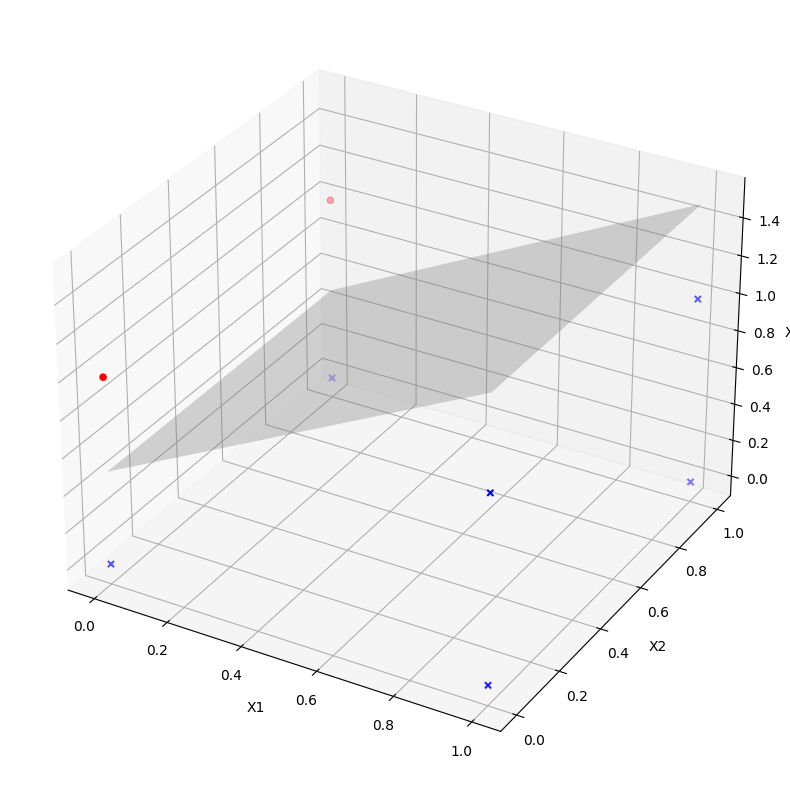

In [ ]:
# 4-19 20183376 박선재

from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X = [[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], \
     [1, 0, 1], [0, 1, 1], [1, 1, 1]]
y = [-1, -1, -1, 1, -1, -1, 1, -1]

p = Perceptron()
p.fit(X, y)

print("학습된 퍼셉트론의 매개변수: ", p.coef_, p.intercept_)
print("훈련집합에 대한 예측: ", p.predict(X))
print("정확률 측정: ", p.score(X, y)*100, "%")


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

X_graph = np.array(X)
y_graph = np.array(y)

ax.scatter(X_graph[y_graph == 1, 0], X_graph[y_graph == 1, 1],\
           X_graph[y_graph == 1, 2], color='r', marker='o')
ax.scatter(X_graph[y_graph == -1, 0], X_graph[y_graph == -1, 1], \
           X_graph[y_graph == -1, 2], color='b', marker='x')

xx, yy = np.meshgrid(range(2), range(2))
zz = (-p.intercept_ - p.coef_[0, 0] * xx - p.coef_[0, 1] * yy) / p.coef_[0, 2]
ax.plot_surface(xx, yy, zz, alpha=.3, color='gray')

ax.set_xlabel('X1'); ax.set_ylabel('X2'); ax.set_zlabel('X3')

plt.show()

In [ ]:
# 5-2(origin) 20183376 박선재
import tensorflow as tf
import numpy as np

EPOCHS = 500

x = [[.0, .0], [.0, 1.], [1., .0], [1., 1.]]
y = [[-1], [1], [1], [1]]

w = tf.Variable(tf.random.uniform([2, 1], -.5, .5))
b = tf.Variable(tf.zeros([1]))

opt = tf.keras.optimizers.SGD(learning_rate=.1)

def forward():
  s = tf.add(tf.matmul(x, w), b)
  o = tf.tanh(s)
  return o

def loss():
  o = forward()
  return tf.reduce_mean((y-o)**2)

for i in range(EPOCHS):
  opt.minimize(loss, var_list=[w, b])
  if(i%100==0): print('loss at epoch', i, '=', loss().numpy())

o = forward()
print(o)

loss at epoch 0 = 0.643208
loss at epoch 100 = 0.08826345
loss at epoch 200 = 0.0414485
loss at epoch 300 = 0.026232067
loss at epoch 400 = 0.018957546
tf.Tensor(
[[-0.8169708 ]
 [ 0.8867145 ]
 [ 0.8868046 ]
 [ 0.99927455]], shape=(4, 1), dtype=float32)


In [ ]:
# 5-2(change) 20183376 박선재
import tensorflow as tf
import numpy as np

EPOCHS = 2000

x = [[.0, .0], [.0, 1.], [1., .0], [1., 1.]]
y = [[-1], [1], [1], [1]]

w = tf.Variable(tf.random.uniform([2, 1], -.5, .5))
b = tf.Variable(tf.zeros([1]))

opt = tf.keras.optimizers.SGD(learning_rate=.1)

def forward():
  s = tf.add(tf.matmul(x, w), b)
  o = tf.tanh(s)
  return o

def loss():
  o = forward()
  return tf.reduce_mean((y-o)**2)

for i in range(EPOCHS):
  opt.minimize(loss, var_list=[w, b])
  if(i%100==0): print('loss at epoch', i, '=', loss().numpy())

o = forward()
print(o)

''' 세대 수를 늘렸을 때 세대 수를 늘린 만큼 손실 값이 더 떨어지기 때문에
    각 label에 대한 예측에 대한 정확도가 증가하게 된다. '''

loss at epoch 0 = 1.1112816
loss at epoch 100 = 0.09756901
loss at epoch 200 = 0.043720078
loss at epoch 300 = 0.027182123
loss at epoch 400 = 0.01946641
loss at epoch 500 = 0.015067101
loss at epoch 600 = 0.01224579
loss at epoch 700 = 0.010291306
loss at epoch 800 = 0.008861424
loss at epoch 900 = 0.007772057
loss at epoch 1000 = 0.0069157346
loss at epoch 1100 = 0.00622564
loss at epoch 1200 = 0.005658093
loss at epoch 1300 = 0.005183416
loss at epoch 1400 = 0.00478075
loss at epoch 1500 = 0.004435021
loss at epoch 1600 = 0.0041350373
loss at epoch 1700 = 0.0038723724
loss at epoch 1800 = 0.0036405197
loss at epoch 1900 = 0.0034344145
tf.Tensor(
[[-0.9146321]
 [ 0.9465237]
 [ 0.9465241]
 [ 0.9999329]], shape=(4, 1), dtype=float32)


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.
x_test = x_test.astype(np.float32)/255.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [ ]:
import numpy as np

y = np.array([0, 0, 1, 0])
y1 = np.array([0.1, 0.9])
o = np.array([np.log(0.1), np.log(0.9)])
o1 = np.array([np.log(0.97), np.log(0.01), np.log(0.01), np.log(0.01)])
print(-np.sum(y*o1))

4.605170185988091


In [6]:
# 5-11 (1) 20183376 박선재

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

x = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [1, 0, 1], \
              [1, 1, 0], [1, 1, 1]])
y = np.array([[-1], [1], [-1], [-1], [-1], [-1], [1], [-1]])

n_input = 3
n_output = 1

per = Sequential()
per.add(Dense(units=n_output, activation='tanh', input_shape=(n_input,), \
              kernel_initializer='random_uniform', bias_initializer='zeros'))

per.compile(loss='mse', \
            optimizer=SGD(learning_rate=.1), metrics=['mse'])
per.fit(x, y, epochs=500, verbose=2)

res = per.predict(x)
print(res)

Epoch 1/500
1/1 - 1s - loss: 0.9864 - mse: 0.9864 - 584ms/epoch - 584ms/step
Epoch 2/500
1/1 - 0s - loss: 0.8553 - mse: 0.8553 - 15ms/epoch - 15ms/step
Epoch 3/500
1/1 - 0s - loss: 0.8065 - mse: 0.8065 - 15ms/epoch - 15ms/step
Epoch 4/500
1/1 - 0s - loss: 0.7861 - mse: 0.7861 - 8ms/epoch - 8ms/step
Epoch 5/500
1/1 - 0s - loss: 0.7763 - mse: 0.7763 - 10ms/epoch - 10ms/step
Epoch 6/500
1/1 - 0s - loss: 0.7709 - mse: 0.7709 - 9ms/epoch - 9ms/step
Epoch 7/500
1/1 - 0s - loss: 0.7677 - mse: 0.7677 - 8ms/epoch - 8ms/step
Epoch 8/500
1/1 - 0s - loss: 0.7655 - mse: 0.7655 - 8ms/epoch - 8ms/step
Epoch 9/500
1/1 - 0s - loss: 0.7640 - mse: 0.7640 - 8ms/epoch - 8ms/step
Epoch 10/500
1/1 - 0s - loss: 0.7628 - mse: 0.7628 - 11ms/epoch - 11ms/step
Epoch 11/500
1/1 - 0s - loss: 0.7618 - mse: 0.7618 - 8ms/epoch - 8ms/step
Epoch 12/500
1/1 - 0s - loss: 0.7610 - mse: 0.7610 - 10ms/epoch - 10ms/step
Epoch 13/500
1/1 - 0s - loss: 0.7603 - mse: 0.7603 - 10ms/epoch - 10ms/step
Epoch 14/500
1/1 - 0s - loss: 0

In [1]:
# 5-11 (2) 20183376 박선재

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

x = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [1, 0, 1], \
              [1, 1, 0], [1, 1, 1]])
y = np.array([[-1], [1], [-1], [-1], [-1], [-1], [1], [-1]])

n_input = 3
n_output = 1
n_layers = 5

per = Sequential()
per.add(Dense(units=n_layers, activation='tanh', input_shape=(n_input,), \
              kernel_initializer='random_uniform', bias_initializer='zeros'))
per.add(Dense(units=n_output, activation='tanh'))

per.compile(loss='mse', \
            optimizer=Adam(learning_rate=.1), metrics=['mse'])
per.fit(x, y, epochs=500, verbose=2)

res = per.predict(x)
print(res)

Epoch 1/500
1/1 - 1s - loss: 1.0310 - mse: 1.0310 - 749ms/epoch - 749ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7703 - mse: 0.7703 - 7ms/epoch - 7ms/step
Epoch 3/500
1/1 - 0s - loss: 0.7979 - mse: 0.7979 - 6ms/epoch - 6ms/step
Epoch 4/500
1/1 - 0s - loss: 0.7901 - mse: 0.7901 - 6ms/epoch - 6ms/step
Epoch 5/500
1/1 - 0s - loss: 0.7608 - mse: 0.7608 - 6ms/epoch - 6ms/step
Epoch 6/500
1/1 - 0s - loss: 0.7510 - mse: 0.7510 - 6ms/epoch - 6ms/step
Epoch 7/500
1/1 - 0s - loss: 0.7702 - mse: 0.7702 - 7ms/epoch - 7ms/step
Epoch 8/500
1/1 - 0s - loss: 0.7421 - mse: 0.7421 - 6ms/epoch - 6ms/step
Epoch 9/500
1/1 - 0s - loss: 0.7271 - mse: 0.7271 - 7ms/epoch - 7ms/step
Epoch 10/500
1/1 - 0s - loss: 0.7313 - mse: 0.7313 - 9ms/epoch - 9ms/step
Epoch 11/500
1/1 - 0s - loss: 0.7295 - mse: 0.7295 - 6ms/epoch - 6ms/step
Epoch 12/500
1/1 - 0s - loss: 0.7143 - mse: 0.7143 - 7ms/epoch - 7ms/step
Epoch 13/500
1/1 - 0s - loss: 0.6943 - mse: 0.6943 - 8ms/epoch - 8ms/step
Epoch 14/500
1/1 - 0s - loss: 0.6844 - mse: